In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")  # or "train.csv" if not renamed

# Display the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

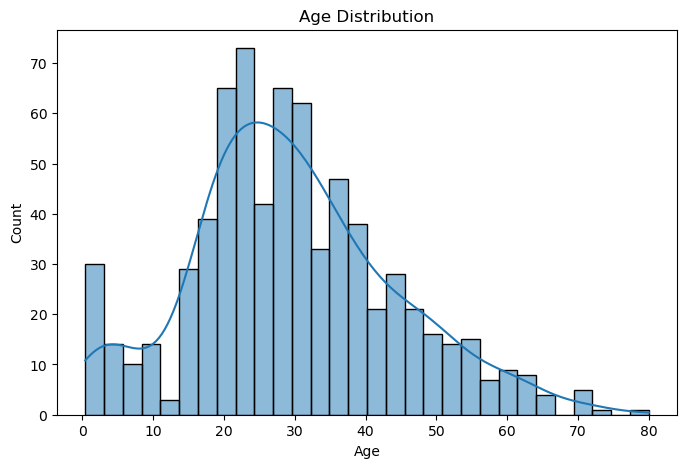

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

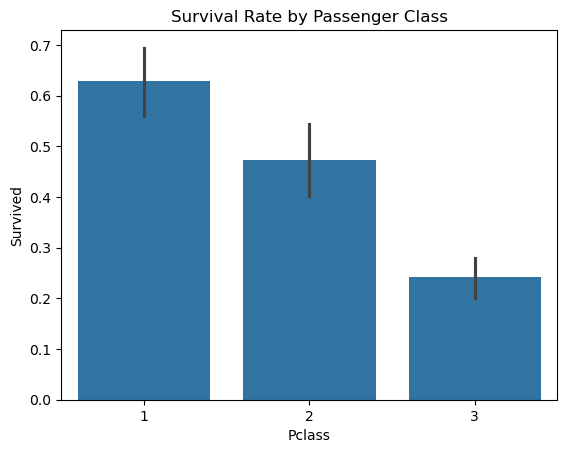

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

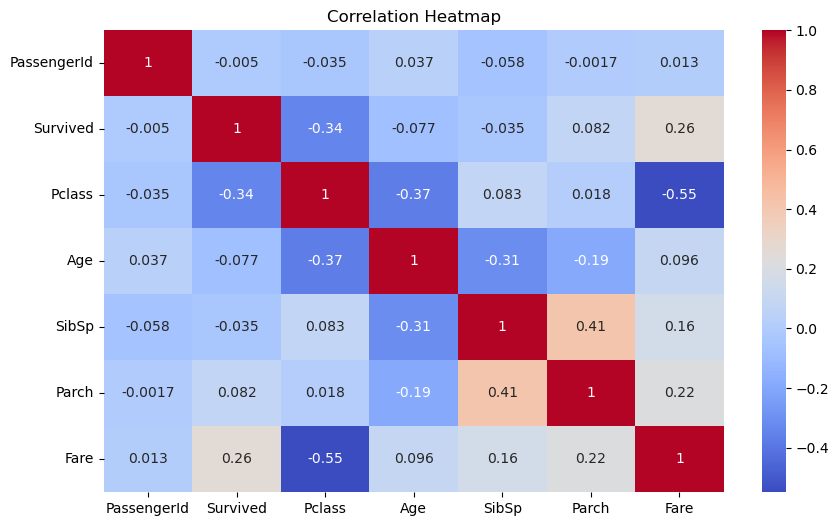

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Extract title from name
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# View unique titles
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

Dataset loaded successfully.

--- EDA: Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- EDA: Dataset Description ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean   

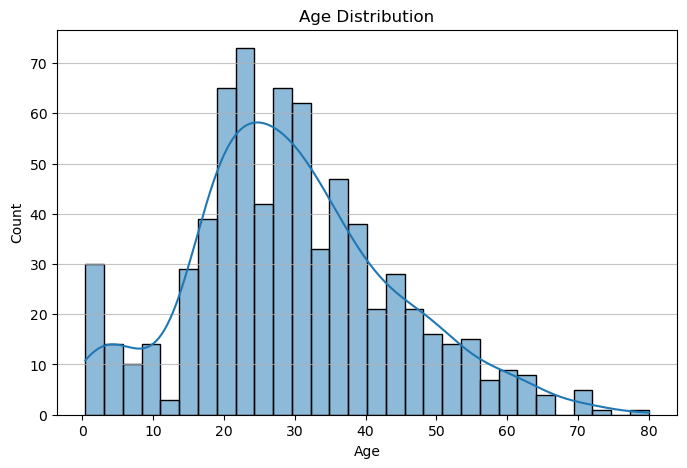

/var/folders/bm/rwzd_k4573q573z_vj0581cr0000gn/T/ipykernel_32635/13854691.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


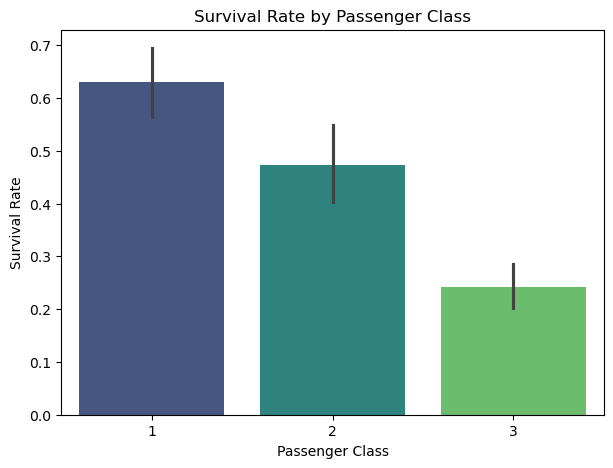

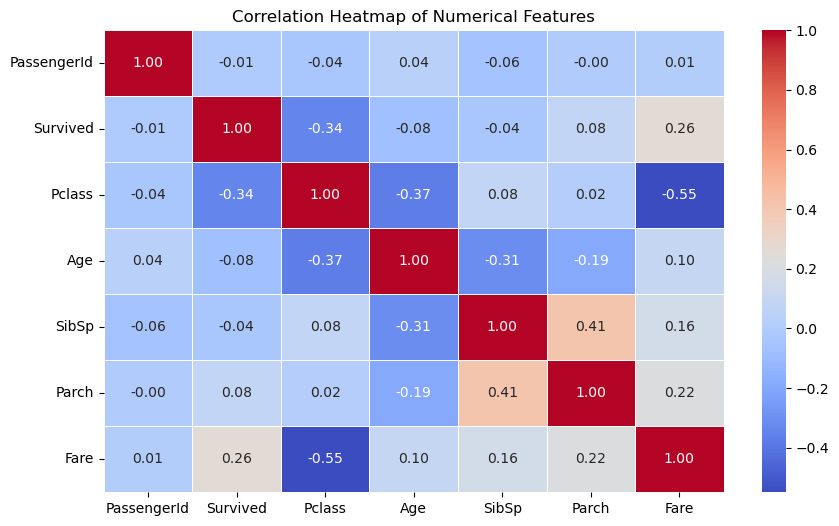


--- Missing Values: Unique Titles After Mapping ---
Title
Mr        538
Master     40
Miss        3
Mrs         2
Name: count, dtype: int64

--- Missing Values: After Handling (Checking nulls) ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            308
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title          308
dtype: int64

--- Feature Engineering ---
Created 'FamilySize' feature. Max FamilySize: 11

Created 'AgeCategory' feature:
AgeCategory
Adult      489
Unknown    308
Child       41
Teen        34
Senior      19
Name: count, dtype: int64

Created 'FamilySizeCategory' feature:
FamilySizeCategory
Single          537
Small Family    292
Large Family     62
Name: count, dtype: int64

Dropped original 'SibSp', 'Parch', 'Name', 'Ticket', 'Title', 'Age', 'FamilySize' columns.
Current DataFrame columns after feature engineering: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Far

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz # Make sure to install graphviz: pip install graphviz and also install the system-level Graphviz software

# --- Load the Titanic dataset ---
# Make sure your CSV file is named "Titanic-Dataset.csv" and is in the same directory as this script.
try:
    df = pd.read_csv("Titanic-Dataset.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Titanic-Dataset.csv' not found. Please ensure the file is in the same directory as the script.")
    exit() # Exit if the dataset isn't found

# --- Part 1: Exploratory Data Analysis (EDA) ---
print("\n--- EDA: Dataset Information ---")
df.info()
print("\n--- EDA: Dataset Description ---")
print(df.describe())

print("\n--- EDA: Data Visualization ---")
# Plot the distribution of age using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Compare survival rate across different passenger classes (Pclass) using a bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Display correlation between numerical features using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# --- Part 2: Handling Missing Values ---

# 1. Fill missing values in the Age column using Title's median age
# Extract title from name
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Map common titles to fewer categories for better median calculation
# You can customize these mappings based on common titles found in your dataset
title_mapping = {
    "Mlle": "Miss", "Mme": "Mrs", "Mr" : "Mr", "Master" : "Master", "Don" : "Mr",
    "Lady" : "Mrs", "Countess" : "Mrs", "Jonkheer" : "Mr", "Sir" : "Mr",
    "Capt" : "Mr", "Ms" : "Miss", "Dr" : "Mr", "Col" : "Mr", "Rev" : "Mr",
    "Major" : "Mr", "Dona" : "Mrs"
}
df['Title'] = df['Title'].map(title_mapping)

print("\n--- Missing Values: Unique Titles After Mapping ---")
print(df['Title'].value_counts())

# Fill missing Age values with the median age of each Title group
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

# 2. Handle missing values in Fare and Embarked
# Replace missing Fare values with the median fare of passengers from the same class
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

# Replace missing Embarked values with the most frequent value (mode)
# Adjusted to avoid the FutureWarning regarding inplace=True
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Drop the Cabin column due to excessive missing values.
df.drop(columns=['Cabin'], inplace=True)

print("\n--- Missing Values: After Handling (Checking nulls) ---")
print(df.isnull().sum()) # Verify no more missing values for Age, Fare, Embarked

# --- Part 3: Feature Engineering ---
print("\n--- Feature Engineering ---")

# 1. Create a new feature FamilySize = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(f"Created 'FamilySize' feature. Max FamilySize: {df['FamilySize'].max()}")

# 2. Convert Age into categories (Child, Teen, Adult, Senior)
def categorize_age(age):
    if pd.isna(age): # Handle potential NaN values (though should be filled by now)
        return 'Unknown'
    elif age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teen'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeCategory'] = df['Age'].apply(categorize_age)
print("\nCreated 'AgeCategory' feature:")
print(df['AgeCategory'].value_counts())

# 3. Convert FamilySize into categories (Single, Small Family, Large Family)
def categorize_family_size(size):
    if size == 1:
        return 'Single'
    elif size <= 4: # Small family defined as 2-4 members
        return 'Small Family'
    else:
        return 'Large Family'

df['FamilySizeCategory'] = df['FamilySize'].apply(categorize_family_size)
print("\nCreated 'FamilySizeCategory' feature:")
print(df['FamilySizeCategory'].value_counts())

# Drop original columns that are no longer needed or replaced by engineered features
df.drop(columns=['SibSp', 'Parch', 'Name', 'Ticket', 'Title', 'Age', 'FamilySize'], inplace=True)
print("\nDropped original 'SibSp', 'Parch', 'Name', 'Ticket', 'Title', 'Age', 'FamilySize' columns.")
print("Current DataFrame columns after feature engineering:", df.columns.tolist())

# --- Part 4: One-Hot Encoding ---
print("\n--- One-Hot Encoding ---")

# Apply one-hot encoding to categorical variables
# 'Sex', 'Embarked', 'Pclass', 'AgeCategory', 'FamilySizeCategory'
# Pclass is numerical but represents categories, so it's good to one-hot encode it too.
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'AgeCategory', 'FamilySizeCategory']
# Using drop_first=True to avoid multicollinearity (N-1 dummy variables)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print("DataFrame after One-Hot Encoding. New columns:")
print(df_encoded.columns.tolist())
print(f"Shape after encoding: {df_encoded.shape}")
print("\nSample of encoded DataFrame head:")
print(df_encoded.head())


# --- Part 5: Decision Tree Classifier ---
print("\n--- Decision Tree Classifier Implementation ---")

# Define features (X) and target (y)
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

# Split the data into train and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Train a Decision Tree Classifier using entropy as the criterion
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)

print("\nDecision Tree Classifier trained successfully.")

# Evaluate model performance using accuracy score
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.4f}")

# Export and visualize the decision tree using graphviz
# This requires graphviz executable to be installed on your system and added to PATH
# For macOS: brew install graphviz
# For Windows: Download from graphviz.org and add to PATH
# You also need to install the Python package: pip install graphviz
try:
    dot_data = export_graphviz(dt_classifier,
                               out_file=None,
                               feature_names=X.columns,
                               class_names=['Not Survived', 'Survived'],
                               filled=True, rounded=True,
                               special_characters=True,
                               max_depth=3) # Limiting depth for better visualization
    graph = graphviz.Source(dot_data)

    # Save the decision tree visualization as a PDF (you can change format to png, etc.)
    # The 'view=True' argument tries to open the generated file immediately.
    graph.render("titanic_decision_tree", format="png", cleanup=True) # Saves as .png, removes .dot file
    print("\nDecision tree visualization generated and saved as 'titanic_decision_tree.png'.")
except Exception as e:
    print(f"\nCould not generate decision tree visualization. Error: {e}")
    print("Please ensure Graphviz is installed on your system and added to your PATH,")
    print("and that the 'graphviz' Python package is installed (`pip install graphviz`).")
